In [ ]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
import seaborn as sn
from sklearn.metrics import median_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools
from pandas import DataFrame

# import dataset
dataset = pd.read_csv('normalized_data2.csv')
print(dataset.shape)
dataset = dataset.dropna()
print(dataset.shape)

df = DataFrame(dataset,columns=['Age','sun_exposure','diagnosis,' 'benign', 'malignant', 'dataset']) 
print(df)

(1210, 19)
(1018, 19)
            Age  sun_exposure  diagnosis,benign  malignant  dataset
0     64.705882          0.27               NaN        NaN      NaN
1     35.294118          0.10               NaN        NaN      NaN
2     35.294118          0.10               NaN        NaN      NaN
3     47.058824          0.17               NaN        NaN      NaN
4     29.411765          0.07               NaN        NaN      NaN
...         ...           ...               ...        ...      ...
1205  52.941176          0.70               NaN        NaN      NaN
1206  52.941176          0.70               NaN        NaN      NaN
1207  41.176471          0.62               NaN        NaN      NaN
1208  41.176471          0.62               NaN        NaN      NaN
1209  58.823529          0.73               NaN        NaN      NaN

[1018 rows x 5 columns]


In [ ]:
X = dataset.iloc[:, :1]
Y = dataset.iloc[:, 4]

# schplliittt data into train & test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# set the value that shall be predicted.
Y_pred = regressor.predict(X_test)


R2 Score:  0.016638522918421828
Mean Squared Error:  0.2634317560723866
False Negative:  0
Mean Absolute Error: 0.4 degrees.
Accuracy: 99.74 %.


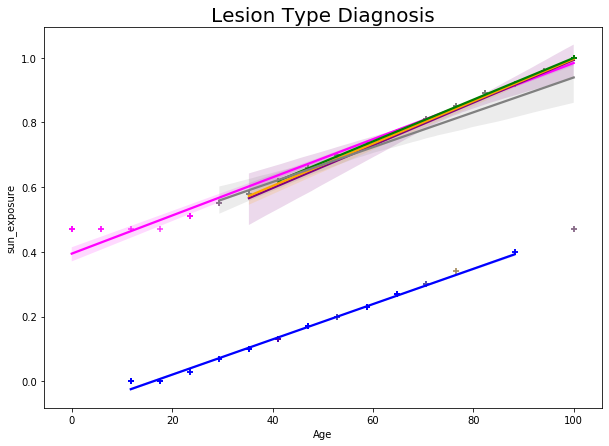

In [ ]:
dataset_nevus_sample= dataset[dataset['diagnosis']=='nevus'].sample(100)
dataset_vascular_lesion_sample= dataset[dataset['diagnosis']=='vascular lesion'].sample(100)
dataset_ak_sample= dataset[dataset['diagnosis']=='actinic keratosis'].sample(100)
dataset_basal_sample= dataset[dataset['diagnosis']=='basal cell carcinoma'].sample(100)
dataset_pigmented_sample= dataset[dataset['diagnosis']=='pigmented benign keratosis'].sample(100)
dataset_derma_sample= dataset[dataset['diagnosis']=='dermatofibroma'].sample(100)

# Regression plot using seaborn.
fig = plt.figure(figsize=(10,7))
plt.title('Lesion Type Diagnosis', size=20)
sns.regplot(x=dataset_nevus_sample.Age,y=dataset_nevus_sample.sun_exposure,color='blue', marker='+')
sns.regplot(x=dataset_vascular_lesion_sample.Age,y=dataset_vascular_lesion_sample.sun_exposure,color='magenta', marker='+')
sns.regplot(x=dataset_ak_sample.Age,y=dataset_ak_sample.sun_exposure,color='purple', marker='+')
sns.regplot(x=dataset_basal_sample.Age,y=dataset_basal_sample.sun_exposure,color='orange', marker='+')
sns.regplot(x=dataset_pigmented_sample.Age,y=dataset_pigmented_sample.sun_exposure,color='green', marker='+')
sns.regplot(x=dataset_derma_sample.Age,y=dataset_derma_sample.sun_exposure,color='gray', marker='+')


# R-squared is a statistical measure of how close the data are to the fitted regression line.
score = r2_score(Y_test, Y_pred)
print('R2 Score: ',score)

mse = median_absolute_error(Y_test, Y_pred)
print('Mean Squared Error: ', mse)

FN = np.logical_and(Y_test != Y_pred, Y_pred == -1).sum()
print('False Negative: ', FN)


#hi ava - i borrowed your code for accuracy :D
errors = abs(Y_pred - Y_test)
# # Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# # Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / len(Y_pred))
# # Calculate and display accuracy
accuracy = 100 - np.mean(Y_pred)
print('Accuracy:', round(accuracy, 2), '%.')



In [ ]:

df = pd.DataFrame(dataset, columns=['diagnosis','Y_pred'])
confusion_matrix = pd.crosstab(df['diagnosis'], df['Y_pred'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)

ValueError: ignored

In [ ]:

# def plot_confusion_matrix(cm, classes,
#                     normalize=False,
#                     title='Confusion matrix',
#                     cmap=plt.cm.Oranges):
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

#     # Plot the confusion matrix
#     plt.figure(figsize = (10, 10))
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title, size = 24)
#     plt.colorbar(aspect=4)
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45, size = 14)
#     plt.yticks(tick_marks, classes, size = 14)

#     fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
    
#     # Labeling the plot
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")
        
#     plt.grid(None)
#     plt.tight_layout()
#     plt.ylabel('True label', size = 18)
#     plt.xlabel('Predicted label', size = 18)

# cm = confusion_matrix(Y_test, X_test)
# plot_confusion_matrix(cm, dataset_nevus_sample = ['Melanoma', 'Normal'],
#                       title = 'Melanoma Diagnosis Confusion Matrix')

# plt.savefig('cm.png')

TypeError: ignored

In [ ]:
# def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
#     """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
#     Arguments
#     ---------
#     confusion_matrix: numpy.ndarray
#         The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
#         Similarly constructed ndarrays can also be used.
#     class_names: list
#         An ordered list of class names, in the order they index the given confusion matrix.
#     figsize: tuple
#         A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
#         the second determining the vertical size. Defaults to (10,7).
#     fontsize: int
#         Font size for axes labels. Defaults to 14.
        
#     Returns
#     -------
#     matplotlib.figure.Figure
#         The resulting confusion matrix figure
#     """
#     df_cm = pd.DataFrame(
#         confusion_matrix, index=class_names, columns=class_names, 
#     )
#     fig = plt.figure(figsize=figsize)
#     try:
#         dataset = sns.dataset(df_cm, annot=True, fmt="d")
#     except ValueError:
#         raise ValueError("Confusion matrix values must be integers.")
#     dataset_nevus_sample.set_ticklabels(dataset_nevus_sample.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
#     dataset_nevus_sample.xaxis.set_ticklabels(dataset_nevus_sample.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
